In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Dataset import
df = pd.read_csv('data/raw/customer_support_tickets.csv')

In [4]:
# Initial Inspection of the Dataset
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

print("\nStatistical summary of numerical columns (if any):")
display(df.describe())


First 5 rows of the dataset:


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-n

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [5]:
#Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [ ]:
# Handle Missing Values 
# Our core task relies on the 'Ticket Description'. If it's missing, the row is useless to us.
# Let's see how many rows have a missing description.
missing_descriptions = df['Ticket Description'].isnull().sum()
print(f"\nNumber of tickets with missing descriptions: {missing_descriptions}")


Number of tickets with missing descriptions: 0


In [7]:
# Check for Duplicates 
# Duplicate tickets can bias our model by giving more weight to certain issues.
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0



Ticket Length Statistics:
count    8469.000000
mean       46.467352
std         8.461730
min        21.000000
25%        43.000000
50%        49.000000
75%        52.000000
max        63.000000
Name: Ticket Length, dtype: float64


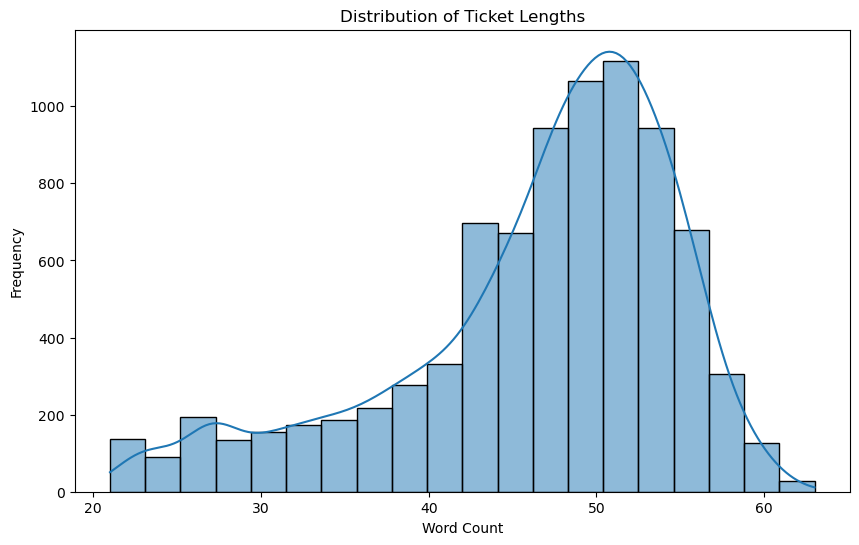

In [12]:
#Ticket Length Analysis
df['Ticket Length'] = df['Ticket Description'].apply(lambda x: len(str(x).split()))
print("\nTicket Length Statistics:")
print(df['Ticket Length'].describe())

# Visualize Ticket Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Ticket Length'], bins=20, kde=True)
plt.title('Distribution of Ticket Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_11901/2712033006.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=top_df, palette='viridis')


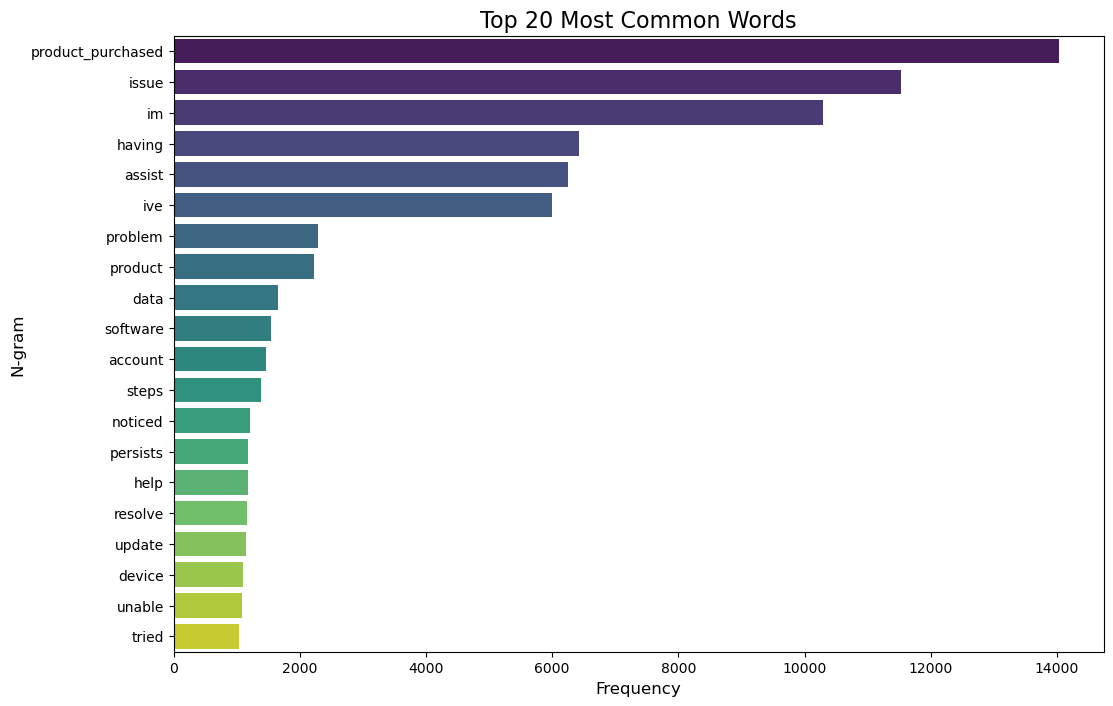

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_11901/2712033006.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=top_df, palette='viridis')


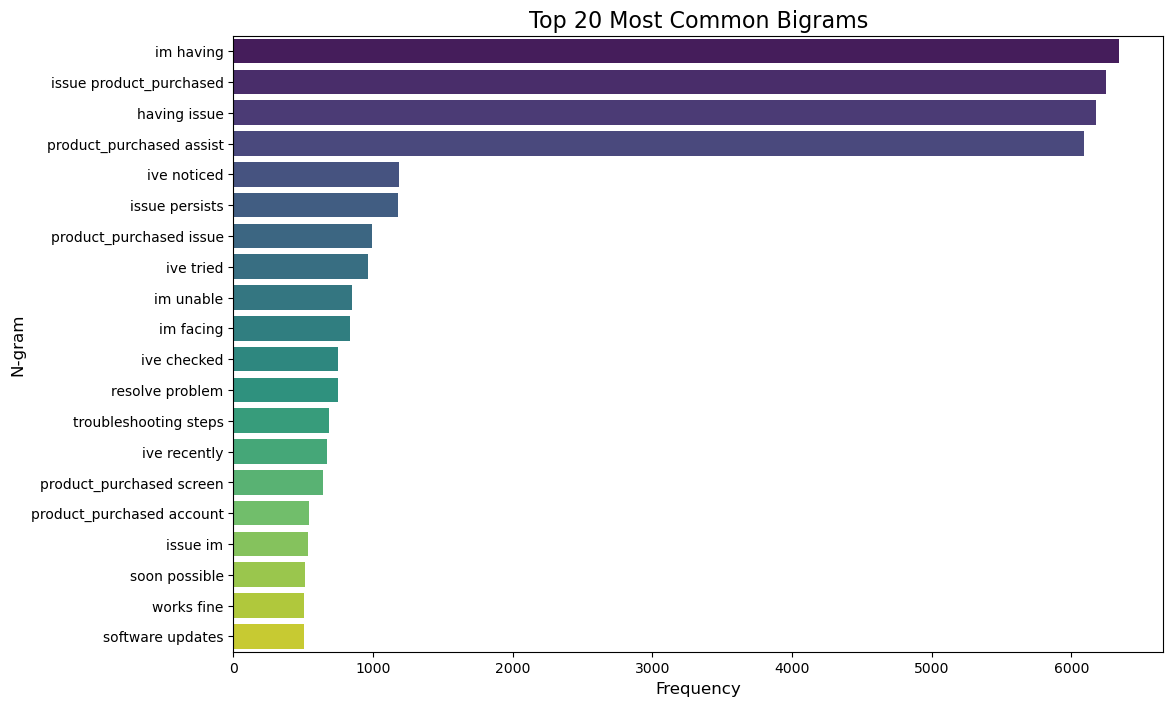

In [ ]:
#Common Words and Phrases Analysis
from sklearn.feature_extraction.text import CountVectorizer
import re

#Basic Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip() # Remove leading/trailing whitespace
    return text

# Apply the cleaning function
df['Cleaned Description'] = df['Ticket Description'].apply(clean_text)


#Function to plot top N n-grams
# This function helps us avoid repeating code for words, bigrams, and trigrams.
def plot_top_ngrams(corpus, title, ngram_range=(1, 1), top_n=20):
    """
    Plots the top N n-grams from a text corpus.
    """
    # Use CountVectorizer to count word/phrase frequencies.
    # stop_words='english' automatically removes common English stop words.
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Create a DataFrame for plotting
    top_df = pd.DataFrame(words_freq[:top_n], columns=['N-gram', 'Frequency'])

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='N-gram', data=top_df, palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('N-gram', fontsize=12)
    plt.show()

# Plot Top 20 Most Common Words (Unigrams)
plot_top_ngrams(df['Cleaned Description'], 'Top 20 Most Common Words', ngram_range=(1, 1))

# Plot Top 20 Most Common Phrases (Bigrams) 
plot_top_ngrams(df['Cleaned Description'], 'Top 20 Most Common Bigrams', ngram_range=(2, 2))

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_11901/1207111937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Ticket Type'], order=df['Ticket Type'].value_counts().index, palette='crest')


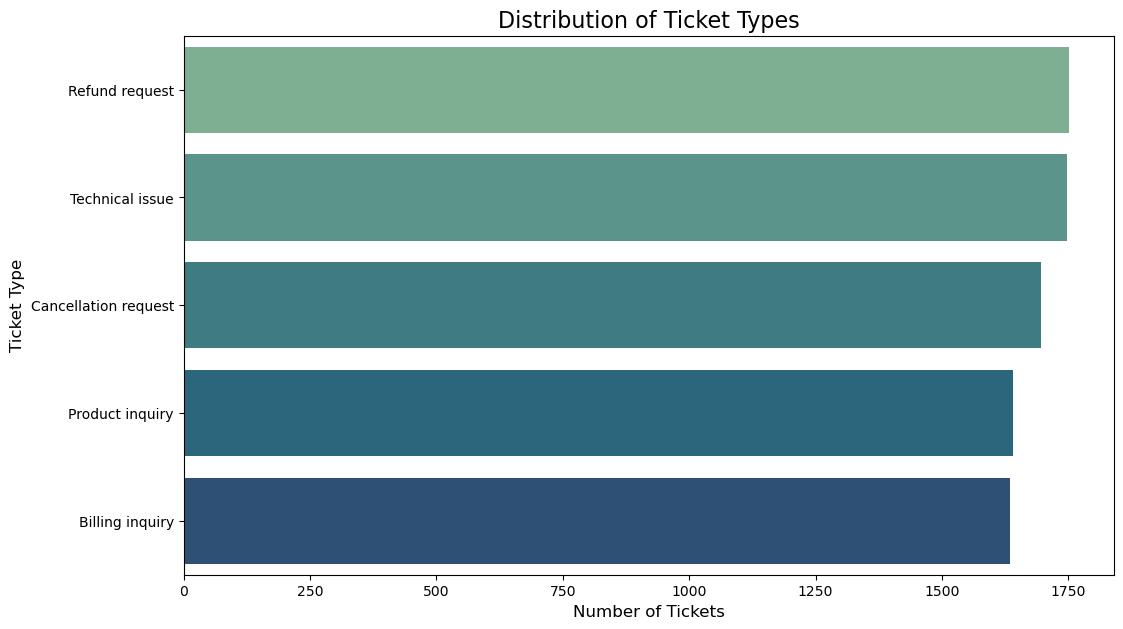

In [15]:
#Analyzing Existing Ticket Type Categories
# Visualize the distribution of ticket types 
plt.figure(figsize=(12, 7))
sns.countplot(y=df['Ticket Type'], order=df['Ticket Type'].value_counts().index, palette='crest')
plt.title('Distribution of Ticket Types', fontsize=16)
plt.xlabel('Number of Tickets', fontsize=12)
plt.ylabel('Ticket Type', fontsize=12)
plt.show()